# Wine Quality Prediction

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Data Inport and Inspection

In [2]:
wine_data = pd.read_csv("winequality_red.csv")

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_data.shape

(1599, 12)

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_data.isnull().sum().sort_values(ascending=False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis

In [8]:
wine_data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

C:\Users\tanweer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wine Quality Counts')

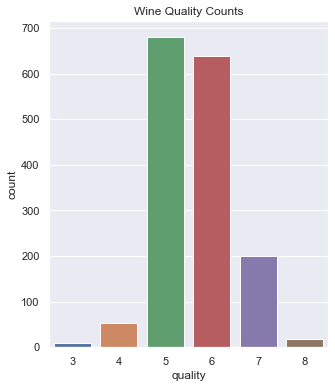

In [9]:
sns.set()
plt.figure(figsize = (5,6))
sns.countplot(wine_data.quality)
plt.title("Wine Quality Counts")

In [10]:
corr = wine_data.corr()

<AxesSubplot:title={'center':'Correlation of Wine Quality Data'}>

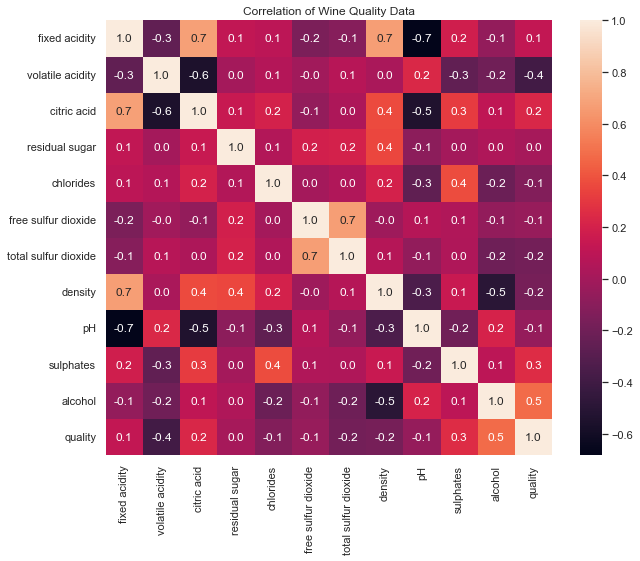

In [11]:
plt.figure(figsize = (10,8))
plt.title("Correlation of Wine Quality Data")
sns.heatmap(corr, annot=True, fmt=".1f")

Text(0.5, 1.0, 'Relationship between Quality of wine and volatile acidity')

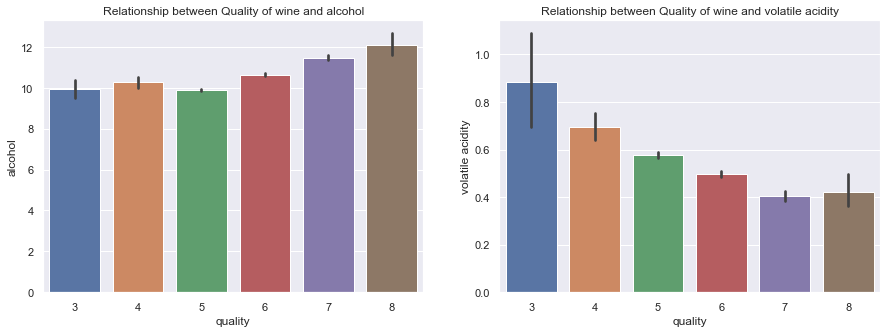

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x="quality", y="alcohol", data=wine_data)
plt.title("Relationship between Quality of wine and alcohol")

plt.subplot(1,2,2)
sns.barplot(x="quality", y="volatile acidity", data=wine_data)
plt.title("Relationship between Quality of wine and volatile acidity")

# Data Preprocessing

In [13]:
X = wine_data.drop(columns=["quality"])
Y = wine_data["quality"].apply(lambda y_value: 1 if y_value >=7 else 0)

In [14]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [16]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Train Test Split

In [17]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Model Selection and Evaluation on Training Data

In [18]:
rf_clssifier = RandomForestClassifier()

In [19]:
rf_clssifier.fit(X_train, Y_train)

RandomForestClassifier()

In [20]:
y_train_predicted = rf_clssifier.predict(X_train)


In [21]:
train_accuracy_score = accuracy_score(y_train_predicted, Y_train)
train_accuracy_score

1.0

# Model Evaluation on Test Data

In [22]:
y_test_predicted = rf_clssifier.predict(X_test)

In [23]:
test_accuracy_score = accuracy_score(y_test_predicted, Y_test)
test_accuracy_score

0.9

# Predictive System - Testing with A Random Dataline in the csv file

In [24]:
#copied line 201 that has a quality of 4 which implies 0-bad
#copied line 202 that has a quality of 7 which implies 1-good

In [25]:
#input_data = (9.6,0.32,0.47,1.4,0.055999999999999994,9.0,24.0,0.99695,3.22,0.82,10.3)
input_data = (6.9,1.09,0.06,2.1,0.061,12.0,31.0,0.9948,3.51,0.43,11.4)

In [26]:
np_input_data = np.asarray(input_data)

In [27]:
np_input_data

array([ 6.9   ,  1.09  ,  0.06  ,  2.1   ,  0.061 , 12.    , 31.    ,
        0.9948,  3.51  ,  0.43  , 11.4   ])

In [28]:
reshaped_input_data = np_input_data.reshape(1,-1)

In [29]:
pred = rf_clssifier.predict(reshaped_input_data)

C:\Users\tanweer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
list(pred)

[0]

In [31]:
def wine_qual(pred):
    if pred[0] == 1:
        return "Wine is of good quality"
    return "Wine is of bad quality"
    
    

In [32]:
wine_qual(pred)

'Wine is of bad quality'